# CS 475/675 Project


## Part 0: Load data and models


In [141]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip -q '/content/drive/MyDrive/ML project/archive.zip' 

replace /content/drive/MyDrive/ML project/IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [142]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from gensim.models import word2vec


In [143]:
print(os.listdir("/content/drive/MyDrive/ML project"))
import warnings
warnings.filterwarnings('ignore')

['IMDB Dataset.csv', 'aclImdb', 'archive.zip', 'action.csv', 'adventure.csv', 'animation.csv', 'biography.csv', 'comedy.csv', 'horror.csv', 'romance.csv', 'scifi.csv', 'runtime_101_600.csv', 'runtime_1_100.csv']


In [144]:
#importing the training data
imdb_data=pd.read_csv('/content/drive/MyDrive/ML project/IMDB Dataset.csv')
test_data=pd.read_csv('/content/drive/MyDrive/ML project/runtime_101_600.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [145]:
print(imdb_data.iloc[7][0])

This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air.


In [146]:
col_list = ["user_review", "sentiment"]
test_action = pd.read_csv('/content/drive/MyDrive/ML project/action.csv',usecols=col_list)
print(test_action.shape)
test_action.head(10)

(500, 2)


,user_review,sentiment
0,This movie - its russian propaganda. Its mean ...,negative
1,They do a better job of explaining this expo t...,positive
2,MSG: ------------------ If you're planning to ...,negative
3,MSG-The Messenger emerged as a social reformin...,positive
4,This is another typical one man taking on hund...,negative
5,The reason for saying it is a must watch is be...,positive
6,The usual story with usual action sequences. T...,negative
7,the movie has lots of action scene which are e...,positive
8,How in the world did this movie get 7.9 rating...,negative
9,Director Koratala Siva comes out with an uniqu...,positive


In [147]:
test_adventure = pd.read_csv('/content/drive/MyDrive/ML project/adventure.csv',usecols=col_list)
print(test_adventure.shape)
test_adventure.head(10) 

(500, 2)


,user_review,sentiment
0,With due respect to Nawaz's acting and the man...,negative
1,Expect no grandeur and very un-Bollywood-like....,positive
2,Go Goa Gone is truly one of the most hilarious...,negative
3,It's a rarity for Indian movies to step beyond...,positive
4,Worst movie I've ever seen and I watched jiu j...,negative
5,Excellent Movie!!! i would rate among the top ...,positive
6,Set during the Ottoman province of Hijaz durin...,negative
7,The film grabs a hold of you and does not let ...,positive
8,"OK just to make it clear, the guys who reviewe...",negative
9,"Finally for all these days it came true, A new...",positive


In [148]:
col_list = ["user_review", "sentiment"]
test_animation = pd.read_csv('/content/drive/MyDrive/ML project/animation.csv',usecols=col_list)
print(test_animation.shape)
test_animation.head(10)

(232, 2)


,user_review,sentiment
0,"OK just to make it clear, the guys who reviewe...",negative
1,"Finally for all these days it came true, A new...",positive
2,"I was a big fan of the original ""Asterix"" comi...",negative
3,It's everything a movie about Asterix should b...,positive
4,This review is nothing but spoilers. Read it o...,negative
5,"It is certainly not a film for children, becau...",positive
6,If you are like me (a passionate DBZ fan who g...,negative
7,This is the Dragon Ball Z Movie experience I a...,positive
8,"Bad plot, awful human animations... in all a w...",negative
9,Not sure why so many negatives about this vers...,positive


In [149]:
test_biography = pd.read_csv('/content/drive/MyDrive/ML project/biography.csv',usecols=col_list)
print(test_biography.shape)
test_biography.head(10)

(462, 2)


,user_review,sentiment
0,This is a movie trying to pass itself as a bio...,negative
1,It was a speechless movie to watch. It's start...,positive
2,With due respect to Nawaz's acting and the man...,negative
3,Expect no grandeur and very un-Bollywood-like....,positive
4,Usually a biography is written after death or ...,negative
5,Usually a biography is written after death or ...,positive
6,This film is a disaster. The narrative is scra...,negative
7,John Stewart does an outstanding job skillfull...,positive
8,"We get it, yip man, ip man, what ever the dude...",negative
9,The most interesting aspect between Herman Yau...,positive


In [150]:
test_comedy = pd.read_csv('/content/drive/MyDrive/ML project/comedy.csv',usecols=col_list)
print(test_comedy.shape)
test_comedy.head(10)

(500, 2)


,user_review,sentiment
0,MSG: ------------------ If you're planning to ...,negative
1,MSG-The Messenger emerged as a social reformin...,positive
2,Recep Ivedik is an example of cinematic parasi...,negative
3,It's not a waste of time. I recommend you to w...,positive
4,One of the worst movies I have ever have seen....,negative
5,The actors of this film are really funny.I rea...,positive
6,Well I don't know how to state this without so...,negative
7,So I can go back in time to times I have never...,positive
8,shame of the Turkish cinema. i can not underst...,negative
9,I watched with this movie with my dad and we l...,positive


In [151]:
col_list = ["user_review", "sentiment"]
test_horror = pd.read_csv('/content/drive/MyDrive/ML project/horror.csv',usecols=col_list)
print(test_horror.shape)
test_horror.head(10)

(500, 2)


,user_review,sentiment
0,i'm honestly just writing this because of the ...,negative
1,The first thing you need to know about this fi...,positive
2,Go Goa Gone is truly one of the most hilarious...,negative
3,It's a rarity for Indian movies to step beyond...,positive
4,"Never do I rate a movie 1, and the only reason...",negative
5,Unlike so many others (general audience not cr...,positive
6,Absolute Dogsh*t is a term that cannot be used...,negative
7,"If you don't like ""found footage"" movies than ...",positive
8,"You'd think a guy that had been kidnapped, abu...",negative
9,This film is not for everyone. It takes one of...,positive


In [152]:
test_romance = pd.read_csv('/content/drive/MyDrive/ML project/romance.csv',usecols=col_list)
print(test_romance.shape)
test_romance.head(10)

(500, 2)


,user_review,sentiment
0,Well I don't know how to state this without so...,negative
1,So I can go back in time to times I have never...,positive
2,I don't know Marathi. By mistake we gone to th...,negative
3,This is not a review of this film. It is an at...,positive
4,typical Bollywood cliché.guy falls in love aft...,negative
5,Varun is phenomenal. Hats off hero. Amazing ac...,positive
6,Absolute masterpiece. A journey you get lost i...,negative
7,"Neither ""Pakhi""(Sonakshi) nor ""Varun""(Ranveer)...",positive
8,The movie was probably aimed at being on of th...,negative
9,The movie was probably aimed at being on of th...,positive


In [153]:
test_scifi = pd.read_csv('/content/drive/MyDrive/ML project/scifi.csv',usecols=col_list)
print(test_scifi.shape)
test_scifi.head(10)

(500, 2)


,user_review,sentiment
0,i'm honestly just writing this because of the ...,negative
1,The first thing you need to know about this fi...,positive
2,After seeing the rating for this on here (curr...,negative
3,"It sounded good, it started OK and then it got...",positive
4,Go Goa Gone is truly one of the most hilarious...,negative
5,It's a rarity for Indian movies to step beyond...,positive
6,"Had planned to watch this multiple times, but ...",negative
7,#Lucia - People who have watched #Inception ar...,positive
8,A complete waste of time.\nNonsense and sillin...,negative
9,I saw the world premiere at Fantasia and chatt...,positive


In [154]:
test_runtime_1_100 = pd.read_csv('/content/drive/MyDrive/ML project/runtime_1_100.csv',usecols=col_list)
print(test_runtime_1_100.shape)
test_runtime_1_100.head(10)

(500, 2)


,user_review,sentiment
0,This movie - its russian propaganda. Its mean ...,negative
1,They do a better job of explaining this expo t...,positive
2,i'm honestly just writing this because of the ...,negative
3,The first thing you need to know about this fi...,positive
4,This was one of the worst high rated movies I'...,negative
5,I never thought that a movie with such a small...,positive
6,After seeing the rating for this on here (curr...,negative
7,"It sounded good, it started OK and then it got...",positive
8,"Dear watchers, As a Turkish, I am embarrassed ...",negative
9,"Dear watchers, As a Turkish, I am embarrassed ...",positive


In [155]:
test_runtime_101_600 = pd.read_csv('/content/drive/MyDrive/ML project/runtime_101_600.csv',usecols=col_list)
print(test_runtime_101_600.shape)
test_runtime_101_600.head(10)

(500, 2)


,user_review,sentiment
0,MSG: ------------------ If you're planning to ...,negative
1,MSG-The Messenger emerged as a social reformin...,positive
2,This is another typical one man taking on hund...,negative
3,The reason for saying it is a must watch is be...,positive
4,The usual story with usual action sequences. T...,negative
5,the movie has lots of action scene which are e...,positive
6,Recep Ivedik is an example of cinematic parasi...,negative
7,It's not a waste of time. I recommend you to w...,positive
8,How in the world did this movie get 7.9 rating...,negative
9,Director Koratala Siva comes out with an uniqu...,positive


In [156]:
test_data.describe()

,movie,user_review,sentiment
count,500,500,500
unique,250,496,2
top,Found a Treasure Called Love,Usually a biography is written after death or ...,positive
freq,2,2,250


## 2 Pre-Processing of Raw Data

In [157]:
df = pd.DataFrame(imdb_data)
df.columns=['review','label']
df.head()

,review,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.describe()

,review,label
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df_test_action = pd.DataFrame(test_action)
df_test_action.columns=['review','label']
df_test_action.head()

,review,label
0,This movie - its russian propaganda. Its mean ...,negative
1,They do a better job of explaining this expo t...,positive
2,MSG: ------------------ If you're planning to ...,negative
3,MSG-The Messenger emerged as a social reformin...,positive
4,This is another typical one man taking on hund...,negative


In [ ]:
df_test_adventure = pd.DataFrame(test_adventure)
df_test_adventure.columns=['review','label']
df_test_adventure.head()

,review,label
0,With due respect to Nawaz's acting and the man...,negative
1,Expect no grandeur and very un-Bollywood-like....,positive
2,Go Goa Gone is truly one of the most hilarious...,negative
3,It's a rarity for Indian movies to step beyond...,positive
4,Worst movie I've ever seen and I watched jiu j...,negative


In [ ]:
df_test_animation = pd.DataFrame(test_animation)
df_test_animation.columns=['review','label']
df_test_animation.head()

,review,label
0,"OK just to make it clear, the guys who reviewe...",negative
1,"Finally for all these days it came true, A new...",positive
2,"I was a big fan of the original ""Asterix"" comi...",negative
3,It's everything a movie about Asterix should b...,positive
4,This review is nothing but spoilers. Read it o...,negative


In [ ]:
df_test_biography = pd.DataFrame(test_biography)
df_test_biography.columns=['review','label']
df_test_biography.head()

,review,label
0,This is a movie trying to pass itself as a bio...,negative
1,It was a speechless movie to watch. It's start...,positive
2,With due respect to Nawaz's acting and the man...,negative
3,Expect no grandeur and very un-Bollywood-like....,positive
4,Usually a biography is written after death or ...,negative


In [ ]:
df_test_comedy = pd.DataFrame(test_comedy)
df_test_comedy.columns=['review','label']
df_test_comedy.head()

,review,label
0,MSG: ------------------ If you're planning to ...,negative
1,MSG-The Messenger emerged as a social reformin...,positive
2,Recep Ivedik is an example of cinematic parasi...,negative
3,It's not a waste of time. I recommend you to w...,positive
4,One of the worst movies I have ever have seen....,negative


In [ ]:
df_test_horror = pd.DataFrame(test_horror)
df_test_horror.columns=['review','label']
df_test_horror.head()

,review,label
0,i'm honestly just writing this because of the ...,negative
1,The first thing you need to know about this fi...,positive
2,Go Goa Gone is truly one of the most hilarious...,negative
3,It's a rarity for Indian movies to step beyond...,positive
4,"Never do I rate a movie 1, and the only reason...",negative


In [ ]:
df_test_romance = pd.DataFrame(test_romance)
df_test_romance.columns=['review','label']
df_test_romance.head()

,review,label
0,Well I don't know how to state this without so...,negative
1,So I can go back in time to times I have never...,positive
2,I don't know Marathi. By mistake we gone to th...,negative
3,This is not a review of this film. It is an at...,positive
4,typical Bollywood cliché.guy falls in love aft...,negative


In [ ]:
df_test_scifi = pd.DataFrame(test_scifi)
df_test_scifi.columns=['review','label']
df_test_scifi.head()

,review,label
0,i'm honestly just writing this because of the ...,negative
1,The first thing you need to know about this fi...,positive
2,After seeing the rating for this on here (curr...,negative
3,"It sounded good, it started OK and then it got...",positive
4,Go Goa Gone is truly one of the most hilarious...,negative


In [ ]:
df_test_runtime_1_100 = pd.DataFrame(test_runtime_1_100)
df_test_runtime_1_100.columns=['review','label']
df_test_runtime_1_100.head()

,review,label
0,This movie - its russian propaganda. Its mean ...,negative
1,They do a better job of explaining this expo t...,positive
2,i'm honestly just writing this because of the ...,negative
3,The first thing you need to know about this fi...,positive
4,This was one of the worst high rated movies I'...,negative


In [ ]:
df_test_runtime_101_600 = pd.DataFrame(test_runtime_101_600)
df_test_runtime_101_600.columns=['review','label']
df_test_runtime_101_600.head()

,review,label
0,MSG: ------------------ If you're planning to ...,negative
1,MSG-The Messenger emerged as a social reformin...,positive
2,This is another typical one man taking on hund...,negative
3,The reason for saying it is a must watch is be...,positive
4,The usual story with usual action sequences. T...,negative


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 2.1 Splitting a sentence to words

In [ ]:
# Word2Vec

# Splitting a sentence to words
def preprocess_word(text, stopwords = False):
  # Removing the html strips
    text = BeautifulSoup(text, "html.parser").get_text()
    
  # Removing the square brackets
    text = re.sub('\[[^]]*\]', '', text)

  # Removing special characters
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)

  # Convert to lower case
    text = text.lower()

  # Tokenize
    filtered_text = nltk.word_tokenize(text)

  # Optional: Remove stopwords (false by default)
    if stopwords:
        stopword_list = set(nltk.corpus.stopwords.words("english"))
        filtered_text = [w for w in filtered_text if not w in stopword_list]

    return filtered_text

# Splitting a sentence to words

def preprocess_sent(data, stopwords = False):
    
    # Split the paragraph into sentences
    #tokenizer=ToktokTokenizer()
    raw = nltk.sent_tokenize(data.strip())
    
    # If the length of the sentence is greater than 0, plug the sentence in the function preprocess_word(clean the sentence)
    sentences = [preprocess_word(sent, stopwords) for sent in raw if len(sent) > 0]
    
    return sentences

While using word2vec, it is not necessary to remove the stopwords such as "the", "a", and so on since the quality of word vectors generated based on Word2vec kind of related to the broader context of the sentence. Besides, for the simplicity, we decide to delete everything except alphabet characters.

### 2.2 Splitting a sentence to words

In [ ]:
def preprocess_sent(data, stopwords = False):
    
    # Split the paragraph into sentences
    #tokenizer=ToktokTokenizer()
    raw = nltk.sent_tokenize(data.strip())
    
    # If the length of the sentence is greater than 0, plug the sentence in the function preprocess_word(clean the sentence)
    sentences = [preprocess_word(sent, stopwords) for sent in raw if len(sent) > 0]
    
    return sentences

Here we split sentences by sentences before splitting them to individual word in case of losing the information included in the sentence.

### 2.3 Splitting dataset

In [ ]:
df.head()

,review,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df2 = df.copy()
df2.label[df2.label=="positive"] = 1
df2.label[df2.label=="negative"] = 0
df2.head()

,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df2_test_action = df_test_action.copy()
df2_test_action.label[df2_test_action.label=="positive"] = 1
df2_test_action.label[df2_test_action.label=="negative"] = 0
df2_test_action.head()

,review,label
0,This movie - its russian propaganda. Its mean ...,0
1,They do a better job of explaining this expo t...,1
2,MSG: ------------------ If you're planning to ...,0
3,MSG-The Messenger emerged as a social reformin...,1
4,This is another typical one man taking on hund...,0


In [ ]:
df2_test_adventure = df_test_adventure.copy()
df2_test_adventure.label[df2_test_adventure.label=="positive"] = 1
df2_test_adventure.label[df2_test_adventure.label=="negative"] = 0
df2_test_adventure.head()

,review,label
0,With due respect to Nawaz's acting and the man...,0
1,Expect no grandeur and very un-Bollywood-like....,1
2,Go Goa Gone is truly one of the most hilarious...,0
3,It's a rarity for Indian movies to step beyond...,1
4,Worst movie I've ever seen and I watched jiu j...,0


In [ ]:
df2_test_animation = df_test_animation.copy()
df2_test_animation.label[df2_test_animation.label=="positive"] = 1
df2_test_animation.label[df2_test_animation.label=="negative"] = 0
df2_test_animation.head()

,review,label
0,"OK just to make it clear, the guys who reviewe...",0
1,"Finally for all these days it came true, A new...",1
2,"I was a big fan of the original ""Asterix"" comi...",0
3,It's everything a movie about Asterix should b...,1
4,This review is nothing but spoilers. Read it o...,0


In [ ]:
df2_test_biography = df_test_biography.copy()
df2_test_biography.label[df2_test_biography.label=="positive"] = 1
df2_test_biography.label[df2_test_biography.label=="negative"] = 0
df2_test_biography.head()

,review,label
0,This is a movie trying to pass itself as a bio...,0
1,It was a speechless movie to watch. It's start...,1
2,With due respect to Nawaz's acting and the man...,0
3,Expect no grandeur and very un-Bollywood-like....,1
4,Usually a biography is written after death or ...,0


In [ ]:
df2_test_comedy = df_test_comedy.copy()
df2_test_comedy.label[df2_test_comedy.label=="positive"] = 1
df2_test_comedy.label[df2_test_comedy.label=="negative"] = 0
df2_test_comedy.head()

,review,label
0,MSG: ------------------ If you're planning to ...,0
1,MSG-The Messenger emerged as a social reformin...,1
2,Recep Ivedik is an example of cinematic parasi...,0
3,It's not a waste of time. I recommend you to w...,1
4,One of the worst movies I have ever have seen....,0


In [ ]:
df2_test_horror = df_test_horror.copy()
df2_test_horror.label[df2_test_horror.label=="positive"] = 1
df2_test_horror.label[df2_test_horror.label=="negative"] = 0
df2_test_horror.head()

,review,label
0,i'm honestly just writing this because of the ...,0
1,The first thing you need to know about this fi...,1
2,Go Goa Gone is truly one of the most hilarious...,0
3,It's a rarity for Indian movies to step beyond...,1
4,"Never do I rate a movie 1, and the only reason...",0


In [ ]:
df2_test_scifi = df_test_scifi.copy()
df2_test_scifi.label[df2_test_scifi.label=="positive"] = 1
df2_test_scifi.label[df2_test_scifi.label=="negative"] = 0
df2_test_scifi.head()

,review,label
0,i'm honestly just writing this because of the ...,0
1,The first thing you need to know about this fi...,1
2,After seeing the rating for this on here (curr...,0
3,"It sounded good, it started OK and then it got...",1
4,Go Goa Gone is truly one of the most hilarious...,0


In [ ]:
df2_test_romance = df_test_romance.copy()
df2_test_romance.label[df2_test_romance.label=="positive"] = 1
df2_test_romance.label[df2_test_romance.label=="negative"] = 0
df2_test_romance.head()

,review,label
0,Well I don't know how to state this without so...,0
1,So I can go back in time to times I have never...,1
2,I don't know Marathi. By mistake we gone to th...,0
3,This is not a review of this film. It is an at...,1
4,typical Bollywood cliché.guy falls in love aft...,0


In [ ]:
df2_test_runtime_1_100 = df_test_runtime_1_100.copy()
df2_test_runtime_1_100.label[df2_test_runtime_1_100.label=="positive"] = 1
df2_test_runtime_1_100.label[df2_test_runtime_1_100.label=="negative"] = 0
df2_test_runtime_1_100.head()

,review,label
0,This movie - its russian propaganda. Its mean ...,0
1,They do a better job of explaining this expo t...,1
2,i'm honestly just writing this because of the ...,0
3,The first thing you need to know about this fi...,1
4,This was one of the worst high rated movies I'...,0


In [ ]:
df2_test_runtime_101_600 = df_test_runtime_101_600.copy()
df2_test_runtime_101_600.label[df2_test_runtime_101_600.label=="positive"] = 1
df2_test_runtime_101_600.label[df2_test_runtime_101_600.label=="negative"] = 0
df2_test_runtime_101_600.head()

,review,label
0,MSG: ------------------ If you're planning to ...,0
1,MSG-The Messenger emerged as a social reformin...,1
2,This is another typical one man taking on hund...,0
3,The reason for saying it is a must watch is be...,1
4,The usual story with usual action sequences. T...,0


In [ ]:
X_test_action=df2_test_action['review']
y_test_action=df2_test_action['label']

In [ ]:
X_test_adventure=df2_test_adventure['review']
y_test_adventure=df2_test_adventure['label']

In [ ]:
X_test_animation=df2_test_animation['review']
y_test_animation=df2_test_animation['label']

In [ ]:
X_test_biography=df2_test_biography['review']
y_test_biography=df2_test_biography['label']

In [ ]:
X_test_comedy=df2_test_comedy['review']
y_test_comedy=df2_test_comedy['label']

In [ ]:
X_test_horror=df2_test_horror['review']
y_test_horror=df2_test_horror['label']

In [ ]:
X_test_romance=df2_test_romance['review']
y_test_romance=df2_test_romance['label']

In [ ]:
X_test_scifi=df2_test_scifi['review']
y_test_scifi=df2_test_scifi['label']

In [ ]:
X_test_runtime_1_100=df2_test_runtime_1_100['review']
y_test_runtime_1_100=df2_test_runtime_1_100['label']

In [ ]:
X_test_runtime_101_600=df2_test_runtime_101_600['review']
y_test_runtime_101_600=df2_test_runtime_101_600['label']

In [ ]:
y_test_action_int=y_test_action.astype('int')

In [ ]:
y_test_adventure_int=y_test_adventure.astype('int')

In [ ]:
y_test_animation_int=y_test_animation.astype('int')

In [ ]:
y_test_biography_int=y_test_biography.astype('int')

In [ ]:
y_test_comedy_int=y_test_comedy.astype('int')
y_test_horror_int=y_test_horror.astype('int')
y_test_romance_int=y_test_romance.astype('int')

In [ ]:
y_test_scifi_int=y_test_scifi.astype('int')
y_test_runtime_1_100_int=y_test_runtime_1_100.astype('int')
y_test_runtime_101_600_int=y_test_runtime_101_600.astype('int')


In [ ]:
X_tv, X_test, y_tv, y_test = train_test_split(df2['review'], df2['label'], test_size=0.15,random_state=0) # 15% data for testing

In [ ]:
df_tv = pd.DataFrame({'review':X_tv, 'label':y_tv})
df_tv.head()

,review,label
9606,Extremely poor action film starring the ever w...,0
32949,This film derives from a Long Running ITV sitc...,0
11441,!!!! MILD SPOILERS !!!!<br /><br />With the ex...,0
27973,"Yep, you read that right, kids. Michael Bay sh...",1
883,This was by far the worst movie I've ever seen...,0


In [ ]:
y_test_int=y_test.astype('int')
y_tv_int=y_tv.astype('int')

In [ ]:
X_tv_c=X_tv.reset_index()
X_tv_c=X_tv_c.drop(['index'], axis=1)
y_tv_c = y_tv.reset_index()
y_tv_c = y_tv_c.drop(['index'], axis=1)

In [ ]:
X_tv = X_tv_c['review']
y_tv = y_tv_c['label']

In [ ]:
from sklearn.model_selection import PredefinedSplit
index_valid = np.random.choice(range(len(X_tv_c)), int(len(X_tv_c)*15/85),replace=False)
index_train = [ele for ele in range(len(X_tv_c)) if ele not in index_valid]
split_index = [-1 if ele not in index_valid else 0 for ele in range(len(X_tv_c)) ]

In [ ]:
pds = PredefinedSplit(test_fold=split_index)
X_train = X_tv_c.iloc[index_train]
y_train = y_tv_c.iloc[index_train]
X_valid = X_tv_c.iloc[index_valid]
y_valid = y_tv_c.iloc[index_valid]

In [ ]:
X_train = X_train['review']
y_train = y_train['label']
X_valid = X_valid['review']
y_valid = y_valid['label']

In [ ]:
y_train 

0        0
1        0
2        0
3        1
4        0
        ..
42495    1
42496    1
42497    1
42498    0
42499    1
Name: label, Length: 35000, dtype: object

In [ ]:
#y_tv_1=y_train+y_valid

In [ ]:
#y_tv_1

In [ ]:
df_train = pd.DataFrame({'review':X_train, 'label':y_train})
df_train

,review,label
0,Extremely poor action film starring the ever w...,0
1,This film derives from a Long Running ITV sitc...,0
2,!!!! MILD SPOILERS !!!!<br /><br />With the ex...,0
3,"Yep, you read that right, kids. Michael Bay sh...",1
4,This was by far the worst movie I've ever seen...,0
...,...,...
42495,I did not set very high expectations for this ...,1
42496,"THE BLOB is a great horror movie, not merely b...",1
42497,"After too many years of waiting, Anne Rivers S...",1
42498,I am a massive fan of the LoG. I thought the f...,0


In [158]:
df_valid = pd.DataFrame({'review':X_valid, 'label':y_valid})

df_valid.head()

,review,label
32637,The 3rd and last big screen spin off from the ...,0
35347,"I happened to love the show growing up, along ...",0
27218,I was really disappointed by this movie. Great...,0
28960,The feel of this movie was amazing. Adam Sandl...,1
40704,SLIGHT SPOILERS (but it doesn't matter anyway)...,0


In [ ]:
df_test = pd.DataFrame({'review':X_test, 'label':y_test})

df_test.head()

,review,label
11841,John Cassavetes is on the run from the law. He...,1
19602,It's not just that the movie is lame. It's mor...,0
45519,"Well, if it weren't for Ethel Waters and a 7-y...",0
25747,I find Alan Jacobs review very accurate concer...,1
42642,This movie is simply awesome. It is so hilario...,1


In [ ]:
sentence = []
# Append labeled reviews first
for review in df_train['review']:
    sentence+=preprocess_sent(review)


In [159]:
print(len(sentence))
print()
print(sentence[:2])

375021

[['extremely', 'poor', 'action', 'film', 'starring', 'the', 'ever', 'wooden', 'dolph', 'lundgren', 'and', 'brandon', 'lee', 'trapped', 'in', 'a', 'sidekick', 'role', 'that', 'never', 'seems', 'to', 'gel'], ['the', 'action', 'is', 'at', 'best', 'average', 'a', 'bit', 'of', 'nudity', 'chucked', 'in', 'and', 'yes', 'tia', 'carrera', 'does', 'use', 'a', 'body', 'double']]


## 3 Word2Vec

In [ ]:
num_features = 400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.001

In [ ]:
# Plug in the sentence variable first.

model = word2vec.Word2Vec(sentence, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)

In [ ]:
# Unload unneccessary memory once the learning process is done.

model.init_sims(replace = True)

In [ ]:
model_name = "250features_40minwords_20context"
model.save(model_name)

In [ ]:
model.most_similar("king")

[('stephen', 0.7065190076828003),
 ('lord', 0.6938136219978333),
 ('kings', 0.6730139255523682),
 ('rings', 0.6421403884887695),
 ('godfather', 0.6318067908287048),
 ('legend', 0.6238721609115601),
 ('lion', 0.6210196018218994),
 ('batman', 0.6180500984191895),
 ('m', 0.6155639886856079),
 ('indiana', 0.6124703884124756)]

In [ ]:
def makeFeatureVec(review, model, num_features):
    
    featureVec = np.zeros((num_features,), dtype = "float32")
    
    # Unique word set
    word_index = set(model.wv.index2word)
    
    # For division we need to count the number of words
    nword = 0
    
    # Iterate words in a review and if the word is in the unique wordset, add the vector values for each word.
    for word in review:
        if word in word_index:
            nword += 1
            featureVec = np.add(featureVec, model[word])
    
    # Divide the sum of vector values by total number of word in a review.
    featureVec = np.divide(featureVec, nword)        
    
    return featureVec

In [ ]:
def getAvgFeatureVec(clean_reviews, model, num_features):
    
    # Keep track of the sequence of reviews, create the number "th" variable.
    review_th = 0
    
    # Row: number of total reviews, Column: number of vector spaces (num_features = 250 we set this in Word2Vec step).
    reviewFeatureVecs = np.zeros((len(clean_reviews), num_features), dtype = "float32")
    
    # Iterate over reviews and add the result of makeFeatureVec.
    for review in clean_reviews:
        reviewFeatureVecs[int(review_th)] = makeFeatureVec(review, model, num_features)
        
        # Once the vector values are added, increase the one for the review_th variable.
        review_th += 1
    
    return reviewFeatureVecs

### Visualization

In [ ]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# List of vocabulary.

vocab = list(model.wv.vocab)

# index vector values by corresponding vocab list

X_temp = model[vocab]

print("Total Number of Vocab:", len(X_temp))
print()
print(X_temp[0][:10])

# Visualize only 100 words.

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X_temp[:150,:])

Total Number of Vocab: 10222

[ 0.01424616 -0.00328114 -0.01190345 -0.00862978 -0.03181722  0.00036046
 -0.0651609   0.05946983  0.01607597  0.07545408]


In [ ]:
df_temp = pd.DataFrame(X_tsne, index = vocab[:150], columns = ['X','Y'])
df_temp.head()

,X,Y
extremely,5.871339,-0.128234
poor,-13.127655,1.571897
action,-5.228388,1.203671
film,-0.588050,0.589062
starring,2.836904,10.095864


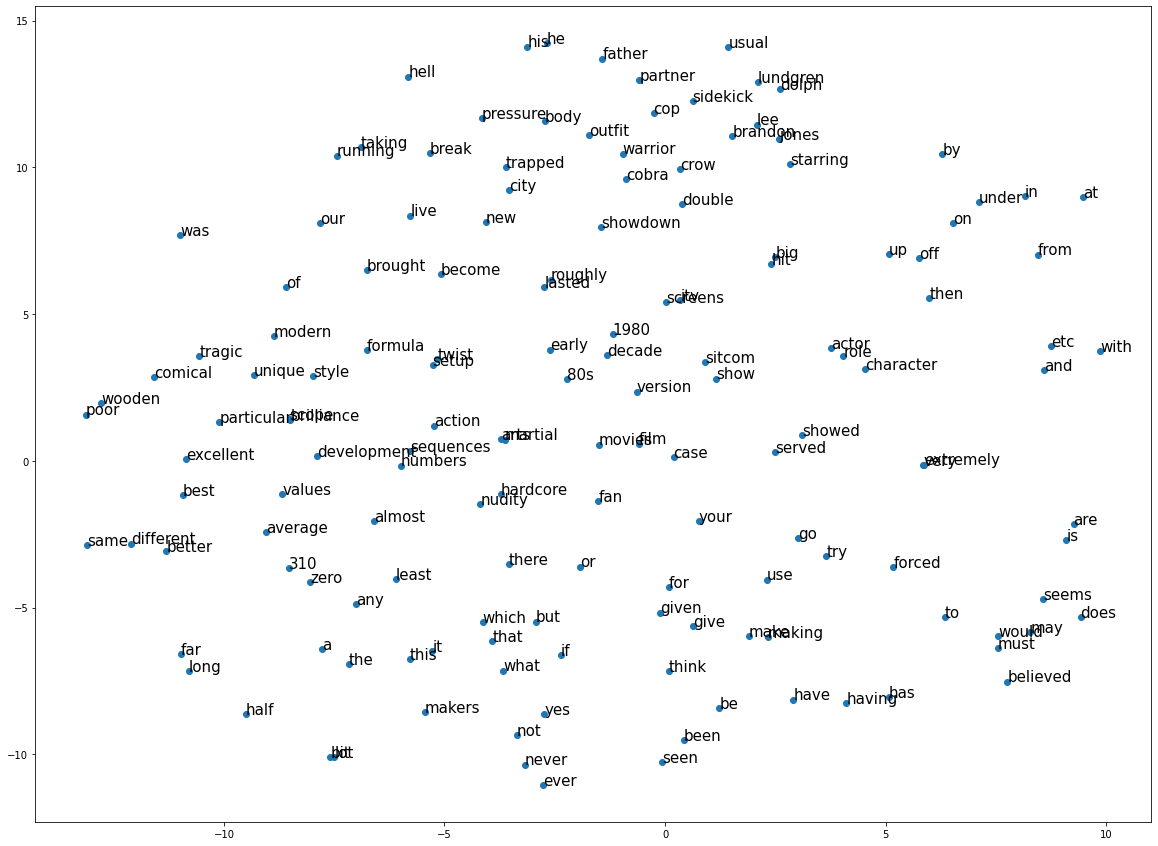

In [ ]:
fig = plt.figure()
fig.set_size_inches(20,15)

ax = fig.add_subplot(1,1,1)
ax.scatter(df_temp['X'], df_temp['Y'])

# Put the label on each point.
for word, pos in df_temp.iterrows():
    ax.annotate(word, pos, fontsize = 15)
plt.show()

In [ ]:
X_tv_word2vec = []

# Clean the reviews by preprocessing function with stopwords option "on".
for review in df_tv['review']:
    X_tv_word2vec.append(preprocess_word(review, stopwords = True))

# Apply "getAvgFeatureVec" function.
tvDataAvg = getAvgFeatureVec(X_tv_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_action_word2vec = []

for review in df_test_action["review"]:
    X_test_action_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_action = getAvgFeatureVec(X_test_action_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_adventure_word2vec = []

for review in df_test_adventure["review"]:
    X_test_adventure_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_adventure = getAvgFeatureVec(X_test_adventure_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_animation_word2vec = []

for review in df_test_animation["review"]:
    X_test_animation_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_animation = getAvgFeatureVec(X_test_animation_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_biography_word2vec = []

for review in df_test_biography["review"]:
    X_test_biography_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_biography = getAvgFeatureVec(X_test_biography_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_comedy_word2vec = []

for review in df_test_comedy["review"]:
    X_test_comedy_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_comedy = getAvgFeatureVec(X_test_comedy_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_horror_word2vec = []

for review in df_test_horror["review"]:
    X_test_horror_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_horror = getAvgFeatureVec(X_test_horror_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_romance_word2vec = []

for review in df_test_romance["review"]:
    X_test_romance_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_romance = getAvgFeatureVec(X_test_romance_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_scifi_word2vec = []

for review in df_test_scifi["review"]:
    X_test_scifi_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_scifi = getAvgFeatureVec(X_test_scifi_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_runtime_1_100_word2vec = []

for review in df_test_runtime_1_100["review"]:
    X_test_runtime_1_100_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_runtime_1_100 = getAvgFeatureVec(X_test_runtime_1_100_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_runtime_101_600_word2vec = []

for review in df_test_runtime_101_600["review"]:
    X_test_runtime_101_600_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_runtime_101_600 = getAvgFeatureVec(X_test_runtime_101_600_word2vec, model, num_features)

In [ ]:
# Same steps repeats as we did for train_set.    
X_test_word2vec = []

for review in df_test["review"]:
    X_test_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg = getAvgFeatureVec(X_test_word2vec, model, num_features)

##4 Modeling

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [161]:
### Compute time complexity

import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

In [162]:
# LinearSVC

sv = LinearSVC(random_state=2020)

param_grid1 = {
    'loss':['squared_hinge'],
    'class_weight':[{1:2}],
    'C': [20],
    'penalty':['l2']
}
tic()
gs_sv = GridSearchCV(sv, param_grid = [param_grid1], verbose = 1, cv = pds, n_jobs = 1, scoring = 'roc_auc' )
gs_sv.fit(tvDataAvg, y_tv_int)
gs_sv_best = gs_sv.best_estimator_
print(gs_sv.best_params_)
toc()
# {'C': 20, 'class_weight': {1: 2}, 'loss': 'squared_hinge', 'penalty': 'l2'} - 86.30

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.0s finished


{'C': 20, 'class_weight': {1: 2}, 'loss': 'squared_hinge', 'penalty': 'l2'}
Elapsed time: 93.808513 seconds.



In [ ]:
gs_sv.score(testDataAvg, y_test.astype('int'))

0.9300396063151619

In [ ]:
sv = LinearSVC(penalty='l2', loss='squared_hinge', class_weight= {1: 2}, C=20)

In [ ]:
sv.score(testDataAvg, y_test.astype('int'))

0.706

In [ ]:
###Logistic Regression

In [163]:
lr = LogisticRegression(random_state = 2020)

lr_param2 = {
    'penalty':['l1',"l2"],
    'dual':[False],
    'C':[20, 30, 40],
    'class_weight':['balanced'],
    'solver':['saga']
    
}

lr_CV = GridSearchCV(lr, param_grid = [lr_param2], cv = pds, scoring = 'roc_auc', n_jobs = 1, verbose = 1)
tic()
lr_CV.fit(tvDataAvg, y_tv_int)
print(lr_CV.best_params_)
logi_best = lr_CV.best_estimator_
toc()

# {'C': 100, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l1', 'solver': 'saga'} - 87.376
# {'C': 50, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l1', 'solver': 'saga'} - 87.380
# {'C': 40, 'class_weight': 'balanced', 

Fitting 1 folds for each of 6 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.4min finished


{'C': 40, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l1', 'solver': 'saga'}
Elapsed time: 251.291948 seconds.



In [ ]:
lr_CV.score(testDataAvg, y_test.astype('int'))

0.9287165983517945

In [ ]:
#y_submission4 = lr_CV.predict(testDataAvg)

In [ ]:
#lr = LogisticRegression(random_state = 2020, C=50, class_weight = "balanced", solver = "saga", dual = False, penalty = "l1")

In [ ]:
#lr.fit(tvDataAvg, y_tv_int)

In [ ]:
#y_lr1 = lr_CV.predict(testDataAvg)

In [ ]:
#y_lr2 = lr_CV.predict(testDataAvg_action)

In [ ]:
#y_lr3 = lr_CV.predict(testDataAvg_adventure)

In [ ]:
#y_lr4 = lr_CV.predict(testDataAvg_animation)

In [ ]:
#y_lr5 = lr_CV.predict(testDataAvg_biography)

In [174]:
tic()
y_lr1 = lr_CV.predict(testDataAvg)
y_lr2 = lr_CV.predict(testDataAvg_action)
y_lr3 = lr_CV.predict(testDataAvg_adventure)
y_lr4 = lr_CV.predict(testDataAvg_animation)
y_lr5 = lr_CV.predict(testDataAvg_biography)
y_lr6 = lr_CV.predict(testDataAvg_comedy)
y_lr7 = lr_CV.predict(testDataAvg_horror)
y_lr8 = lr_CV.predict(testDataAvg_romance)
y_lr9 = lr_CV.predict(testDataAvg_scifi)
y_lr10 = lr_CV.predict(testDataAvg_runtime_1_100)
y_lr11 = lr_CV.predict(testDataAvg_runtime_101_600)
toc()

Elapsed time: 0.023921 seconds.



In [ ]:
from sklearn.metrics import confusion_matrix
def evaluate_score(y_test,y_hat):
  TN, FP, FN, TP = confusion_matrix(y_test, y_hat).ravel()
  Accuracy = round(((TP) + (TN))/((TP) + (TN) + (FP) + (FN)), 3)
  Precision = round((TP)/((TP) + (FP)), 3)
  Recall = round((TP)/((TP) + (FN)), 3)
  Specificity = round((TN)/((TN) + (FP)), 3)
  False_Positive_Rate = round((FP)/((FP) + (TN)), 3)
  F1_Score = round(2*(Precision * Recall)/(Precision + Recall), 3)
  Balanced_Accuracy = round((Recall + Specificity)/2, 3)
  #print('TN =', TN)
 # print('FP =', FP)
 # print('FN =', FN)
 # print('TP =', TP)
 # print('Accuracy =', Accuracy)
 # print('Precision =', Precision)
 # print('Recall =', Recall)
 # print('Specificity =', Specificity)
 # print('False_Positive_Rate =', False_Positive_Rate)
 # print('F1_Score =', F1_Score)
 # print('Balanced_Accuracy =', Balanced_Accuracy)
  res=pd.DataFrame([TN, FP, FN, TP, Accuracy, Precision, Recall, Specificity, False_Positive_Rate, F1_Score, Balanced_Accuracy])
  return(res)

In [ ]:
res_word2vec_lr_test=evaluate_score(y_test_int,y_lr1)
res_word2vec_lr_runtime_1_100=evaluate_score(y_test_runtime_1_100_int,y_lr10)
res_word2vec_lr_runtime_101_600=evaluate_score(y_test_runtime_101_600_int,y_lr11)
res_word2vec_lr_action=evaluate_score(y_test_action_int,y_lr2)
res_word2vec_lr_adventure=evaluate_score(y_test_adventure_int,y_lr3)
res_word2vec_lr_animation=evaluate_score(y_test_animation_int,y_lr4)
res_word2vec_lr_biography=evaluate_score(y_test_biography_int,y_lr5)
res_word2vec_lr_comedy=evaluate_score(y_test_comedy_int,y_lr6)
res_word2vec_lr_horror=evaluate_score(y_test_horror_int,y_lr7)
res_word2vec_lr_romance=evaluate_score(y_test_romance_int,y_lr8)
res_word2vec_lr_scifi=evaluate_score(y_test_scifi_int,y_lr9)

In [ ]:
res_word2vec_lr=pd.concat([res_word2vec_lr_test, res_word2vec_lr_runtime_1_100, res_word2vec_lr_runtime_101_600, 
                        res_word2vec_lr_action, res_word2vec_lr_adventure, res_word2vec_lr_animation, res_word2vec_lr_biography, 
                        res_word2vec_lr_comedy, res_word2vec_lr_horror, res_word2vec_lr_romance, res_word2vec_lr_scifi], axis=1, ignore_index=True)
res_word2vec_lr.columns=['Test_Split', 'Runtime_1_100', 'Runtime_101_600','Action', 'Adventure', 'Animation','Biography', 'Comedy', 'Horror','Romance', 'Sci_fi']
res_word2vec_lr.index=['TN', 'FP', 'FN', 'TP',' Accuracy', 'Precision', 'Recall', 'Specificity', 'FPR', 'F1', 'Balanced_Accuracy']

In [ ]:
res_word2vec_lr

,Test_Split,Runtime_1_100,Runtime_101_600,Action,Adventure,Animation,Biography,Comedy,Horror,Romance,Sci_fi
TN,3222.000,162.000,157.000,175.000,165.000,55.000,100.000,155.000,204.000,134.000,190.000
FP,574.000,88.000,93.000,75.000,85.000,61.000,131.000,95.000,46.000,116.000,60.000
FN,534.000,71.000,38.000,64.000,51.000,12.000,36.000,48.000,73.000,40.000,84.000
TP,3170.000,179.000,212.000,186.000,199.000,104.000,195.000,202.000,177.000,210.000,166.000
Accuracy,0.852,0.682,0.738,0.722,0.728,0.685,0.639,0.714,0.762,0.688,0.712
Precision,0.847,0.670,0.695,0.713,0.701,0.630,0.598,0.680,0.794,0.644,0.735
Recall,0.856,0.716,0.848,0.744,0.796,0.897,0.844,0.808,0.708,0.840,0.664
Specificity,0.849,0.648,0.628,0.700,0.660,0.474,0.433,0.620,0.816,0.536,0.760
FPR,0.151,0.352,0.372,0.300,0.340,0.526,0.567,0.380,0.184,0.464,0.240
F1,0.851,0.692,0.764,0.728,0.745,0.740,0.700,0.738,0.749,0.729,0.698


## LSTM

In [165]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence

In [ ]:
np.shape(tvDataAvg)

(42500, 400)

In [ ]:
tvDataAvg.shape[1]

400

In [166]:
embedding_vector_length=32  
top_words = 5000  
model = Sequential() 
model.add(Embedding(embedding_vector_length, input_length=tvDataAvg.shape[1], output_dim=100))
model.add(LSTM(100, activation = 'tanh', recurrent_activation='hard_sigmoid', dropout=0.2))
model.add(Dense(1, activation='sigmoid'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
tic()
model.fit(tvDataAvg, y_tv_int, epochs=2, batch_size=256)
toc()

Epoch 1/2
167/167 [==============================] - 410s 2s/step - loss: 0.6933 - accuracy: 0.5032
Epoch 2/2
167/167 [==============================] - 410s 2s/step - loss: 0.6933 - accuracy: 0.5003
Elapsed time: 828.151916 seconds.



In [167]:
score, acc = model.evaluate(testDataAvg, y_test_int, verbose=0)
#print("Accuracy: %.2f%%" % (score[1]*100))
print("Test score: %.2f%%" % (score*100))

Test score: 69.31%


0.5061333333333333
              precision    recall  f1-score   support

         pos       0.51      1.00      0.67      3796
         neg       0.00      0.00      0.00      3704

    accuracy                           0.51      7500
   macro avg       0.25      0.50      0.34      7500
weighted avg       0.26      0.51      0.34      7500

[[3796    0]
 [3704    0]]


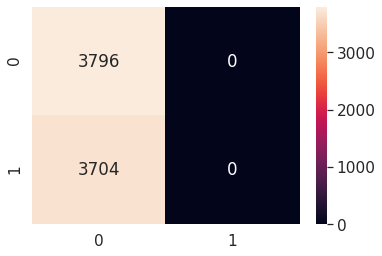

In [168]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn
y_pred = model.predict_classes(np.array(testDataAvg))
from sklearn import metrics
print(metrics.accuracy_score(y_test_int, y_pred))
target_names = ['pos', 'neg']
cnf_matrix_test = confusion_matrix(y_test_int, y_pred)
print(classification_report(y_test_int, y_pred, target_names=target_names))
print(cnf_matrix_test)
df_cm = pd.DataFrame(cnf_matrix_test, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d')

In [169]:
TP = cnf_matrix_test[1, 1]
TN = cnf_matrix_test[0, 0]
FP = cnf_matrix_test[0, 1]
FN = cnf_matrix_test[1, 0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.4938666666666667
